In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Task 1:Create a dataset profile table that gives an overview of the dataset. Output in HTML FILE "dataset_profile.html"

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport  # Updated import
import numpy as np
filepath="data/Baltimore911.csv"
# Load the dataset
df = pd.read_csv(filepath, low_memory=False)

# Get the total number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

# Create a profile report
profile = ProfileReport(df, explorative=True)  # No change

# Generate the profile report
profile.to_file("dataset_profile.html")  # Use .html instead of .pdf for better visualization

# Print the basic dataset overview
print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_columns}")

# Loop through each column and gather information
data_profile = []
for column in df.columns:
    unique_count = df[column].nunique()
    data_type = str(df[column].dtype)

    # Check for missing values
    missing_percentage = (df[column].isnull().sum() / num_rows) * 100

    if data_type in ['int64', 'float64', 'int', 'float']:
        # Numeric attributes
        min_val = df[column].min()
        max_val = df[column].max()
        mean_val = df[column].mean()
        median_val = df[column].median()
        std_deviation = df[column].std()
    else:
        # Categorical attributes
        min_val = max_val = mean_val = median_val = std_deviation = None

    data_profile.append({
        'Column Name': column,
        'Data Type': data_type,
        'Unique Value Count': unique_count,
        'Min': min_val,
        'Max': max_val,
        'Mean': mean_val,
        'Median': median_val,
        'S.D.': std_deviation,
        'Missing (%)': missing_percentage
    })

print("-----------------------------------------------------------------")
# Convert the list of dictionaries to a DataFrame
data_profile_df = pd.DataFrame(data_profile)

# Step 3: Display the data profile table
print("Data Profile Table:")
print(data_profile_df)


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.87it/s]


Total number of call instances/rows: 292761
Total number of call features/columns: 16
-----------------------------------------------------------------
Data Profile Table:
        Column Name Data Type  Unique Value Count        Min        Max  \
0         CrimeDate    object                2300        NaN        NaN   
1         CrimeTime    object                1475        NaN        NaN   
2         CrimeCode    object                  81        NaN        NaN   
3          Location    object               27064        NaN        NaN   
4       Description    object                  14        NaN        NaN   
5    Inside/Outside    object                   4        NaN        NaN   
6            Weapon    object                   5        NaN        NaN   
7              Post    object                 133        NaN        NaN   
8          District    object                  10        NaN        NaN   
9      Neighborhood    object                 278        NaN        NaN   
10 

#### Task 2: Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations.

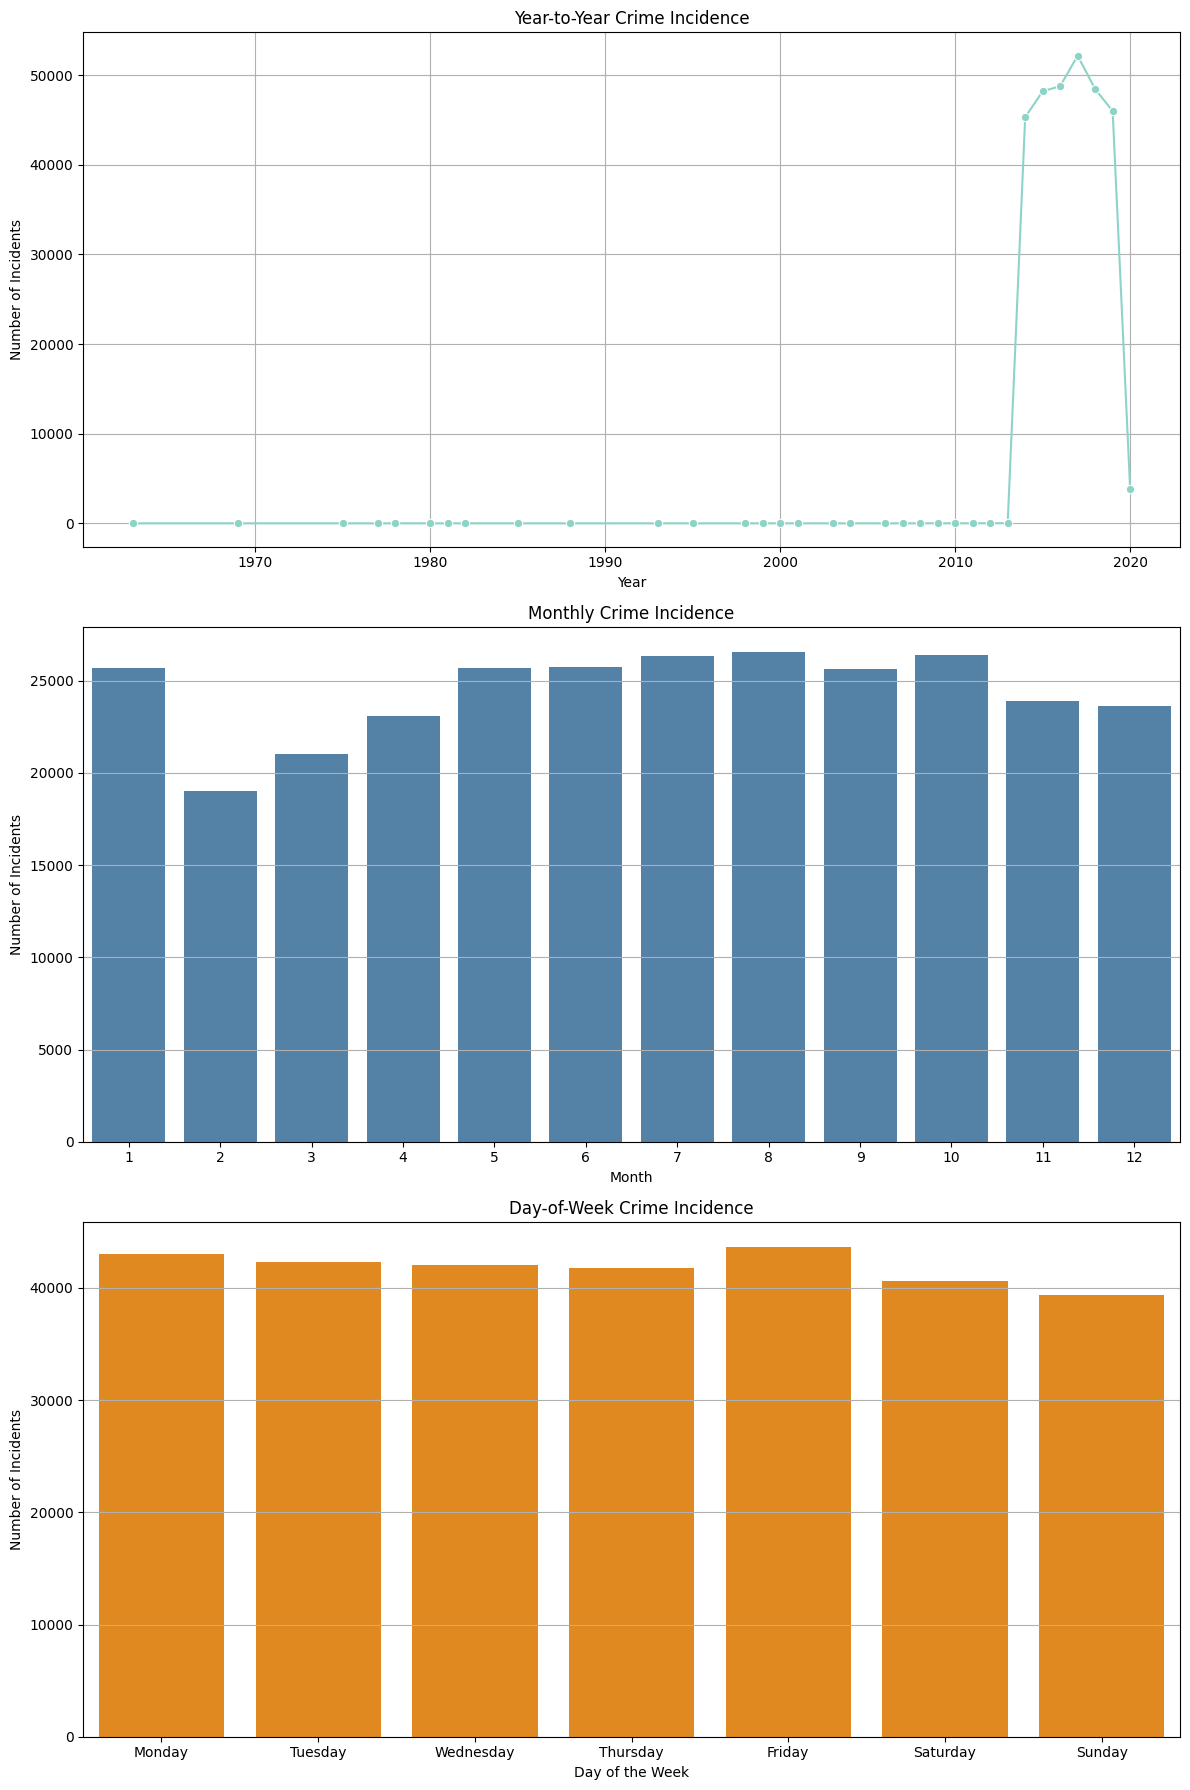

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a 'CrimeDate' column, convert it to a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Create new columns for year, month, and day of the week
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek  # 0=Monday, 6=Sunday

# Aggregating data for year-to-year crime incidence
yearly_incidents = df['Year'].value_counts().sort_index()

# Aggregating data for monthly crime incidence
monthly_incidents = df.groupby('Month')['Month'].count()

# Aggregating data for day-of-week crime incidence
day_of_week_incidents = df.groupby('DayOfWeek')['DayOfWeek'].count()

# Set a consistent color palette
sns.set_palette('Set3')

# Create subplots for each distribution
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Year-to-Year Crime Incidence
sns.lineplot(data=yearly_incidents, marker='o', ax=axes[0])
axes[0].set_title('Year-to-Year Crime Incidence')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Incidents')
axes[0].grid(True)

# Monthly Crime Incidence (using a single color)
sns.barplot(x=monthly_incidents.index, y=monthly_incidents.values, ax=axes[1], estimator="sum", color='steelblue')
axes[1].set_title('Monthly Crime Incidence')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Incidents')
axes[1].grid(axis='y')

# Day-of-Week Crime Incidence (using a single color)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_incidents_df = pd.DataFrame({'DayOfWeek': day_names, 'Incidents': day_of_week_incidents.values})
sns.barplot(data=day_of_week_incidents_df, x='DayOfWeek', y='Incidents', order=day_names, ax=axes[2], estimator="sum", color='darkorange')
axes[2].set_title('Day-of-Week Crime Incidence')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Incidents')
axes[2].grid(axis='y')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



#### Task 3: Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods.

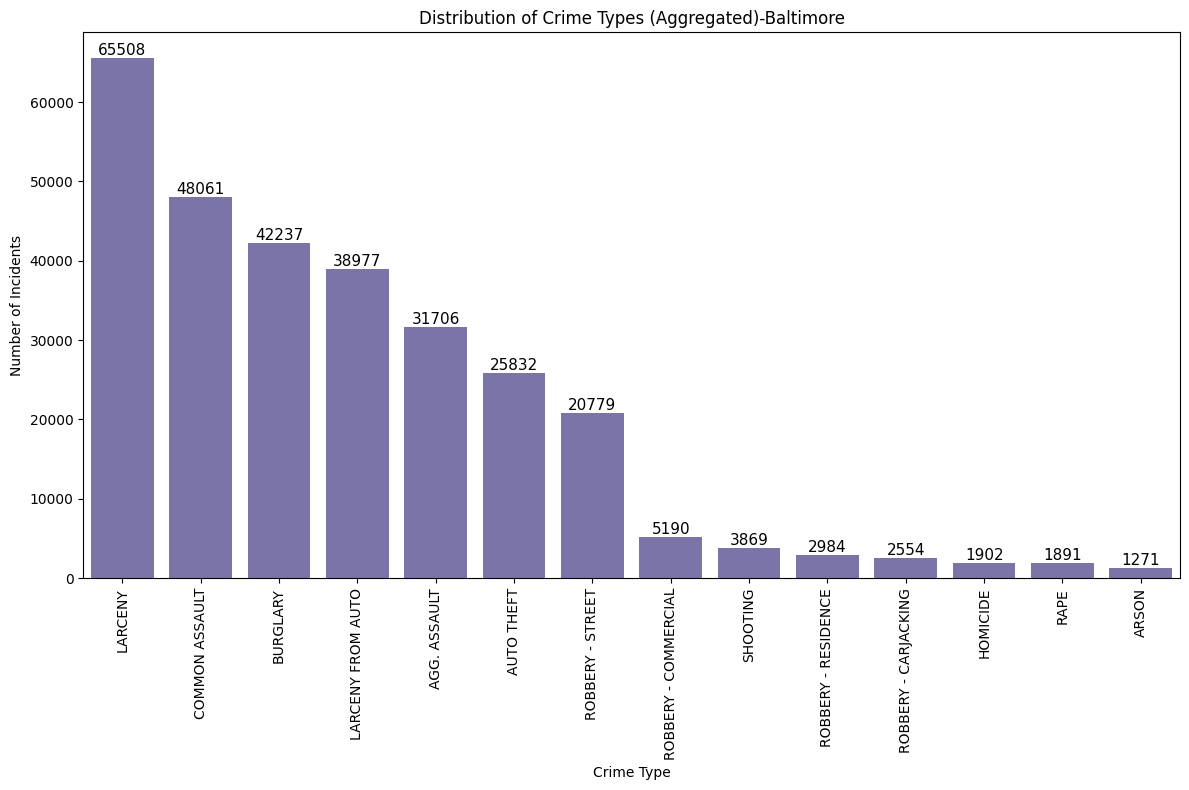

In [4]:
# Group the data by crime type and count the incidents
crime_type_counts = df['Description'].value_counts()

# Create a bar plot for crime type distribution
plt.figure(figsize=(12, 8))
ax=sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values,color='#756bb1', estimator="sum")
ax.bar_label(ax.containers[0], fontsize=11);
plt.title('Distribution of Crime Types (Aggregated)-Baltimore')
plt.ylabel('Number of Incidents')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.tight_layout()


# Show the plot
plt.show()

#### Task 4: Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.

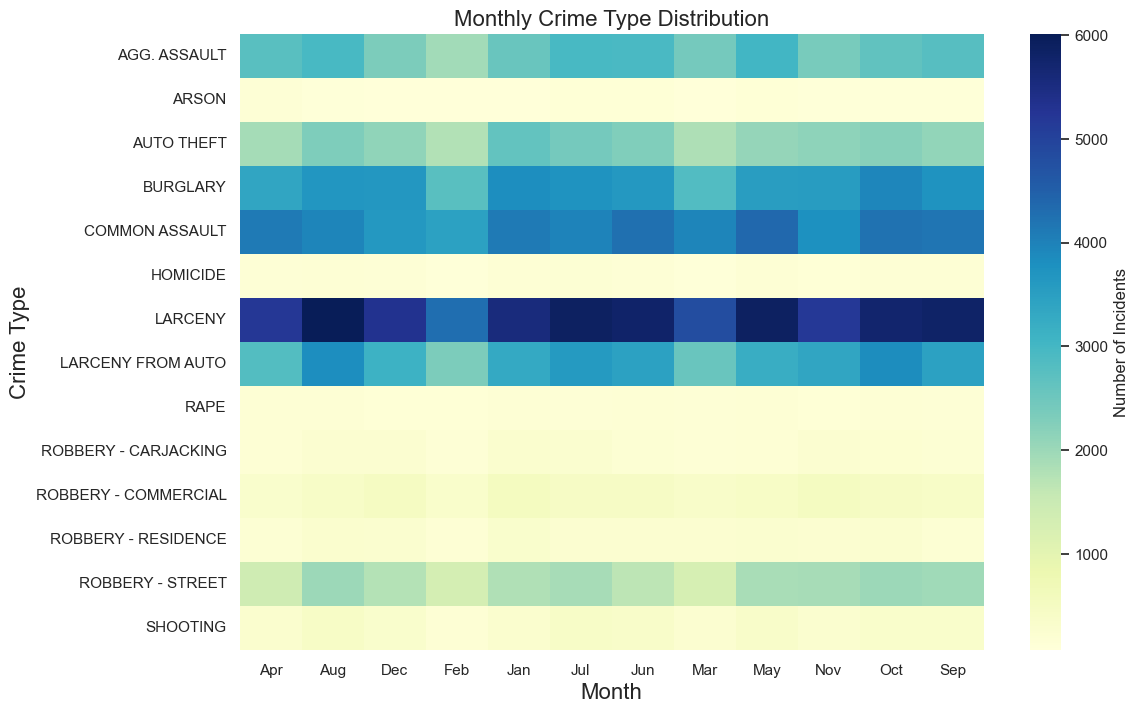

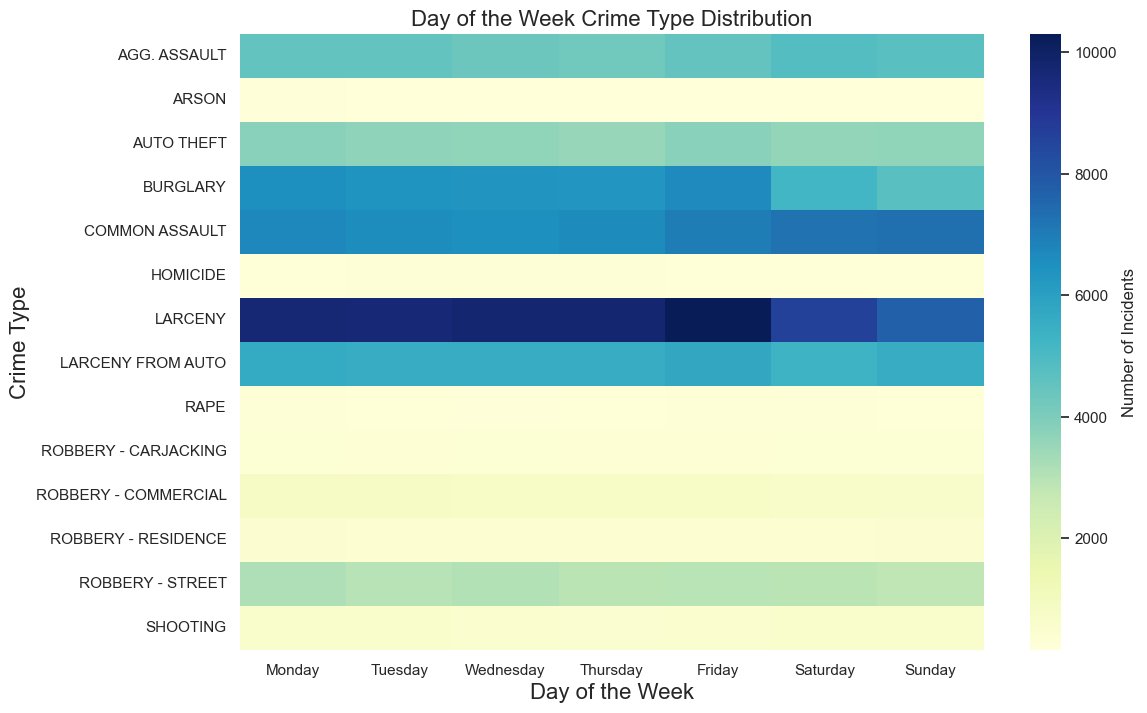

In [5]:
import plotly.express as px

# Convert the 'CrimeDate' column to datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of the week from the 'CrimeDate' column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.strftime('%b')  # Use '%b' for short month names
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

# Calculate the total incidents for each row
df['Total Incidents'] = 1

# Set Seaborn style to a white background
sns.set(style="whitegrid", palette="tab20c")

# Yearly crime type distribution (Stacked Plot)
yearly_crime_counts = df.groupby(['Year', 'Description'])['Total Incidents'].sum().reset_index()
fig_yearly = px.bar(yearly_crime_counts, x='Year', y='Total Incidents', color='Description',
                    title='Yearly Crime Type Distribution',
                    labels={'Total Incidents': 'Number of Incidents'},
                    barmode='stack')
fig_yearly.update_xaxes(type='category')  # Ensure years are treated as categories
#fig_yearly.update_traces(texttemplate='%{y}', textposition='inside')  # Add tooltips showing incident count
fig_yearly.show()

# Monthly crime type distribution (Heatmap with x and y axes interchanged)
monthly_crime_counts = df.groupby(['Month', 'Description'])['Total Incidents'].sum().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_crime_counts.T, cmap="YlGnBu", cbar_kws={'label': 'Number of Incidents'})
plt.title('Monthly Crime Type Distribution',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Crime Type',fontsize=16)
plt.show()

# Day of the week crime type distribution (Heatmap with x and y axes interchanged)
day_of_week_crime_counts = df.groupby(['DayOfWeek', 'Description'])['Total Incidents'].sum().unstack(fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_crime_counts = day_of_week_crime_counts.reindex(day_order)
plt.figure(figsize=(12, 8))
sns.heatmap(day_of_week_crime_counts.T, cmap="YlGnBu", cbar_kws={'label': 'Number of Incidents'})
plt.title('Day of the Week Crime Type Distribution',fontsize=16)
plt.xlabel('Day of the Week',fontsize=16)
plt.ylabel('Crime Type',fontsize=16)
plt.show()


#### Task5 Design a dashboard that allows users like Gary to explore the spatial and temporal patterns of crime. You may get inspiration from tasks 2-4, but feel free to add insights. Bonus: Create a real dynamic dashboard that allows users to change parameters such as location and time period.

In [6]:
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go

# Clean Data
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], errors='coerce')
df = df.dropna(subset=['CrimeDate'])
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df = df.dropna(subset=['Latitude', 'Longitude'])
df = df.dropna(subset=['Description'])

# Extract temporal features for easier filtering
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['Day'] = df['CrimeDate'].dt.day
df['Weekday'] = df['CrimeDate'].dt.dayofweek  # 0=Monday, 6=Sunday

# Month and weekday names for better labeling
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
    'October', 'November', 'December'
]
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Replace numeric month and weekday values with names
df['MonthName'] = df['Month'].apply(lambda x: month_names[x-1])  # Adjust month indexing (0-based)
df['WeekdayName'] = df['Weekday'].apply(lambda x: weekday_names[x])

# Initialize Dash app
app = dash.Dash(__name__)

# Dropdown options for Year, Month, and Day of Week
year_options = [{'label': str(year), 'value': year} for year in df['Year'].unique()]
month_options = [{'label': month, 'value': month} for month in range(1, 13)]  # Months from 1 to 12
weekday_options = [{'label': weekday, 'value': i} for i, weekday in enumerate(weekday_names)]  # Days of the week (0=Monday to 6=Sunday)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Crime Data Dashboard", style={'text-align': 'center', 'color': '#333', 'font-family': 'Arial, sans-serif'}),
    
    # Filters for Year, Month, and Day of Week
    html.Div([
        html.Div([  # Year Filter
            html.Label('Select Year', style={'font-size': '16px', 'font-weight': 'bold', 'margin-bottom': '5px'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=year_options,
                value=year_options[0]['value'],  # Default value
                multi=False,
                style={'width': '100%', 'padding': '10px', 'box-sizing': 'border-box'}
            ),
        ], style={'width': '30%', 'padding': '10px', 'display': 'inline-block', 'vertical-align': 'top'}),

        html.Div([  # Month Filter
            html.Label('Select Month', style={'font-size': '16px', 'font-weight': 'bold', 'margin-bottom': '5px'}),
            dcc.Dropdown(
                id='month-dropdown',
                options=month_options,
                value=1,  # Default value (January)
                multi=False,
                style={'width': '100%', 'padding': '10px', 'box-sizing': 'border-box'}
            ),
        ], style={'width': '30%', 'padding': '10px', 'display': 'inline-block', 'vertical-align': 'top'}),

        html.Div([  # Weekday Filter
            html.Label('Select Weekday', style={'font-size': '16px', 'font-weight': 'bold', 'margin-bottom': '5px'}),
            dcc.Dropdown(
                id='weekday-dropdown',
                options=weekday_options,
                value=0,  # Default value (Monday)
                multi=False,
                style={'width': '100%', 'padding': '10px', 'box-sizing': 'border-box'}
            ),
        ], style={'width': '30%', 'padding': '10px', 'display': 'inline-block', 'vertical-align': 'top'}), 
    ], style={'padding': '20px', 'display': 'flex', 'justify-content': 'center', 'flex-wrap': 'wrap'}),

    # Graphs to display: Crime Type Distribution, Temporal Patterns
    html.Div([
        dcc.Graph(id='crime-type-distribution', style={'margin-top': '20px'}),
        dcc.Graph(id='temporal-patterns', style={'margin-top': '20px'}),
        dcc.Graph(id='crime-location-heatmap', style={'margin-top': '20px'}),  # Added Heatmap
    ], style={'padding': '20px', 'display': 'flex', 'justify-content': 'center', 'flex-direction': 'column'}),
])

# Callback to update the plots based on user input (year, month, weekday)
@app.callback(
    [Output('crime-type-distribution', 'figure'),
     Output('temporal-patterns', 'figure')],
    [Input('year-dropdown', 'value'),
     Input('month-dropdown', 'value'),
     Input('weekday-dropdown', 'value')]
)
def update_plots(selected_year, selected_month, selected_weekday):
    # Filter the dataset based on user input
    filtered_df = df[(df['Year'] == selected_year) & 
                     (df['Month'] == selected_month) & 
                     (df['Weekday'] == selected_weekday)]
    
    # Check if filtered data is empty
    if filtered_df.empty:
        return {}, {}

    # 1. Crime Type Distribution (Bar Plot)
    crime_type_counts = filtered_df['Description'].value_counts().reset_index()
    crime_type_counts.columns = ['Crime Type', 'Count']
    crime_type_plot = px.bar(
        crime_type_counts, 
        x='Crime Type', y='Count', 
        title=f'Crime Type Distribution ({selected_year} - {month_names[selected_month-1]} - {weekday_names[selected_weekday]})',
        labels={'Crime Type': 'Crime Type', 'Count': 'Number of Incidents'},
        template='plotly_dark'
    )

    # 2. Temporal Pattern (Using full Date instead of just Day)
    filtered_df.loc[:, 'Date'] = pd.to_datetime(filtered_df[['Year', 'Month', 'Day']])  # Fixing SettingWithCopyWarning
    temporal_data = filtered_df.groupby('Date').size().reset_index(name='Incidents')
    
    # Temporal plot with date formatting for better granularity
    temporal_plot = px.line(
        temporal_data, 
        x='Date', y='Incidents', 
        title=f'Temporal Pattern ({selected_year} - {month_names[selected_month-1]} - {weekday_names[selected_weekday]})',
        labels={'Incidents': 'Number of Incidents'},
        template='plotly_dark'
    )

    # Format the x-axis with a custom date format for readability
    temporal_plot.update_xaxes(
        tickformat='%Y-%m-%d',  # YYYY-MM-DD format for better clarity
        tickangle=45,  # Rotate the ticks for better legibility
        tickmode='linear'  # Use a linear tickmode for continuous dates
    )

    return crime_type_plot, temporal_plot


# Callback for Heatmap that is independent of dropdown parameters
@app.callback(
    Output('crime-location-heatmap', 'figure'),
    [Input('year-dropdown', 'value')]  # Dummy input to trigger callback
)
def update_heatmap(_):
    # Create the heatmap with all data, replacing density_mapbox with density_map
    crime_location_heatmap = px.density_map(
        df, 
        lat='Latitude', lon='Longitude', 
        z='Description', 
        color_continuous_scale="Viridis", 
        title="Crime Location Heatmap"
    )
    crime_location_heatmap.update_layout(mapbox_zoom=3)

    return crime_location_heatmap


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

